<a href="https://colab.research.google.com/github/markmorcos/ironhack-mini-project-shark-attacks/blob/main/Shark_Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

sharks_df = pd.read_excel('GSAF5.xls')

sharks_df = sharks_df.drop(['pdf', 'Unnamed: 22', 'Unnamed: 21', 'Case Number.1', 'Case Number', 'href', 'href formula', 'Unnamed: 11'], axis=1)
sharks_df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Time,Species,Source,original order
0,2024-10-14 00:00:00,2024.0,Unprovoked,Honduras,Tela,Atlantida,Swimming,Roberto Carlose Bu Mejia,M,38,Back and thigh extensive tissue loss,?,Bull shark,Georgienne Bradley: Daily Mail UK: FTN News.com,NaN
1,2024-10-11 00:00:00,2024.0,Unprovoked,USA,Florida,Brevard County Orlando,Surfing,Teddy Witteman,M,16,Bite to left arm,?,Bull shark 6ft,Todd SmithFlorida today: News 4:,NaN
2,2024-09-17 00:00:00,2024.0,Unprovoked,Honduras,Trujillo Colon,Puerto Castillo,Diving for shellfish,Fernando Mendoza Ocampo,M,33,Bite to left leg,?,Bull shark 6-7ft,Daily Mail UK: The Sun UK: The World Watch,NaN
3,2024-09-16 00:00:00,2024.0,Unprovoked,Morocco,Southern Morocco,West of Dakhla,Swimming - jumped off yacht,German Tourist,F,30,Leg severed,1600hr,Reportedly a Great White,Andy Currie: Moroccan World News: Sky News,NaN
4,2024-08-26 00:00:00,2024.0,Unprovoked,Jamaica,Montego Bay,Falmouth,Spearfishing,Jahmari Reid,M,16,Head right arm and leg severed,?,Reportedly Tiger Shark,Todd Smith: Daily Mail UK: Sky News: People .com,NaN


In [12]:
'''
print(df.head(), end="\n\n")
print(df.info(), end="\n\n")
print(df.describe(include="all"), end="\n\n")
print(df.nunique(), end="\n\n")

print(df["Unnamed: 21"])
'''



'\nprint(df.head(), end="\n\n")\nprint(df.info(), end="\n\n")\nprint(df.describe(include="all"), end="\n\n")\nprint(df.nunique(), end="\n\n")\n\nprint(df["Unnamed: 21"])\n'

In [14]:
#Explode the Country lists into separate rows
sharks_df['Country'] = sharks_df['Country'].str.split(' / ')
sharks_df = sharks_df.explode('Country')
sharks_df["Country"].unique()

#replace bad entries with a single country but too repetitive doesn't show true data cleaning
sharks_df['Country'] = sharks_df['Country'].replace({'CEYLON (SRI LANKA)': 'Sri Lanka'})
sharks_df['Country'] = sharks_df['Country'].replace({'ST HELENA, British overseas territory': 'Saint Helena'})

#lowercased the countries
sharks_df["Country"] = sharks_df["Country"].str.lower()
sharks_df = sharks_df.dropna(subset=['Country'])

#Call method strip to strip off question marks at the end
sharks_df['Country'] = sharks_df['Country'].str.strip('?')

# For case-insensitive match
sharks_df = sharks_df[~sharks_df['Country'].str.contains('asia|africa|ocean|sea|gulf', case=False, regex=True, na=False)]

#Main test code
#sharks_df["Country"].unique()
#sharks_df["Country"].describe()
sharks_df["Country"].value_counts()


Country
usa                 2551
australia           1485
new zealand          145
bahamas              137
papua new guinea     136
                    ... 
aruba                  1
bay of bengal          1
slovenia               1
curacao                1
korea                  1
Name: count, Length: 183, dtype: int64

In [46]:
#Creating a Shark attack states dataframe to focus on USA

#Called method groupby to create dataframe and changed letters to lowercase
sharks_usa = sharks_df.groupby("Country").get_group("usa")
sharks_usa.loc[:, "State"] = sharks_usa["State"].str.lower()

#Cleaning outlier data with spelling errors or erroneous data
sharks_usa.loc[:, 'State'] = sharks_usa['State'].replace({'noirth carolina': 'north carolina'})
sharks_usa = sharks_usa[sharks_usa["State"] != 'cuba']

sharks_usa["State"].value_counts()
#display(sharks_usa)


State
florida                     1183
hawaii                       341
california                   324
south carolina               172
north carolina               119
texas                         81
new jersey                    56
new york                      45
oregon                        31
virginia                      19
massachusetts                 18
louisiana                     18
puerto rico                   17
georgia                       17
alabama                       17
maryland                      10
delaware                       8
rhode island                   8
mississippi                    8
connecticut                    6
us virgin islands              5
new york                       3
washington                     2
east coast                     2
north carolina                 2
bahamas                        2
palmyra atoll                  2
maui                           2
guam                           2
maine                          2
 uta

In [48]:
#sharks_df = pd.read_excel('https://www.sharkattackfile.net/spreadsheets/GSAF5.xls')
# Drop unnecessary columns
#sharks_df = sharks_df.drop(['pdf', 'Unnamed: 22', 'Unnamed: 21', 'Case Number.1', 'Case Number', 'href', 'href formula', 'Unnamed: 11'], axis=1)

# Filter the DataFrame for shark attacks in Florida
florida_attacks = sharks_usa[sharks_usa['State'] == 'florida']


In [50]:
#Cleaning the variable that only has Florida as a state

#filtering
florida_attacks = florida_attacks.dropna(subset=['Location', 'Year'])

## Clean extra spaces and standardize names
florida_attacks['Location'] = florida_attacks['Location'].str.replace(r'\s+', ' ', regex=True).str.strip()

#clean outlier errors
florida_attacks['Location'] = florida_attacks['Location'].replace({'Ponce Inlet, New Smyrna Beach, Volusia County': 'New Smyrna Beach, Volusia County'})

# Group by 'Location' to combine duplicates and sum counts
#florida_attacks= florida_attacks('Location').sum().reset_index()

display(florida_attacks)




,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Time,Species,Source,original order
1,2024-10-11 00:00:00,2024.0,Unprovoked,usa,florida,Brevard County Orlando,Surfing,Teddy Witteman,M,16,Bite to left arm,?,Bull shark 6ft,Todd SmithFlorida today: News 4:,NaN
8,2024-07-08 00:00:00,2024.0,Unprovoked,usa,florida,Ponce de Leon Inlet Volusia County,Diving into Water,Dempsey Manhart,M,14,Lower left leg injury,11hr15,4-5ft Blacktip shark,Miami Herald,NaN
9,2024-07-05 00:00:00,2024.0,Unprovoked,usa,florida,New Smyrna Beach,Wading,Not stated,M,26,Minor injury to left foot,16hr15,Not specified,Sacbee Fox 35,NaN
14,2024-07-04 00:00:00,2024.0,Unprovoked,usa,florida,New Smyrna Beach Beach Access 14 Volusia County,Swimming,Not released,M,NaN,Bite to left leg,1100hr,6ft shark,Brietbart .com,NaN
15,2024-06-07 00:00:00,2024.0,Unprovoked,usa,florida,Rosemary Beach Walton County,Swimming,Elisabeth Foley,F,45,Significant injuries to pelvic and abdominal r...,13h15,Not specified Bull shark highly suspect,12onyourside.com: News Channel 7wjhg : Al.Com:,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6888,No date,0.0,Unprovoked,usa,florida,"Key West, Monroe County",Kitesurfing,Paul Menta,M,NaN,Hand bitten,NaN,NaN,Internet,86.0
6897,"No date, Before 1975",0.0,Provoked,usa,florida,"Riviera Beach, Palm Beach County",Skin diving. Grabbed shark's tail; shark turne...,Carl Bruster,M,19,"Ankle punctured & lacerated, hands abraded PRO...",NaN,"Nurse shark, 2.1 m [7']","R. Skocik, p.176",77.0
6904,"No date, Before 1902",0.0,Unprovoked,usa,florida,"Mosquito Inlet (Ponce Inlet), Volusia County",Canoeing,male,M,NaN,FATAL,NaN,NaN,"W.H. Gregg, p.19; L. Schultz & M. Malin, ...",70.0
6920,Before 1958,0.0,Unprovoked,usa,florida,"Palm Beach, Palm Beach County",Standing,Horton Chase,M,NaN,Abrasions & bruises hip to ankle,NaN,NaN,"V.M. Coppleson (1956), p.255; R.F. Hutton",54.0


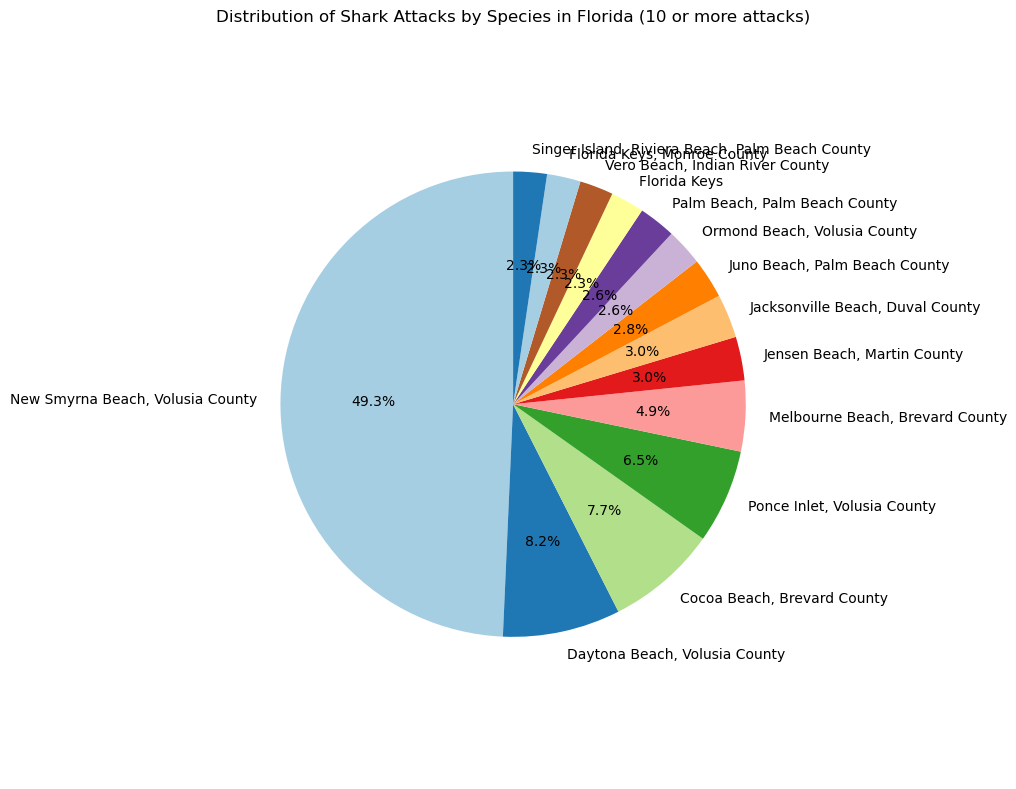

In [52]:
# Count the number of attacks by species
species_counts = florida_attacks['Location'].value_counts()

# Filter out species with fewer than 10 attacks
filtered_species_counts = species_counts[species_counts >= 10]

# Check if there are any species with 10 or more attacks
if filtered_species_counts.empty:
    print("No species with 10 or more attacks found in Florida.")
else:
    # Plot: Pie chart of shark attacks by species in Florida with 10 or more attacks
    plt.figure(figsize=(10, 8))
    plt.pie(filtered_species_counts, labels=filtered_species_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title('Distribution of Shark Attacks by Species in Florida (10 or more attacks)')
    plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
    plt.tight_layout()
    plt.show()

In [54]:
#TEST CASE
#print(filtered_species_counts)
display(florida_attacks)

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,Injury,Time,Species,Source,original order
1,2024-10-11 00:00:00,2024.0,Unprovoked,usa,florida,Brevard County Orlando,Surfing,Teddy Witteman,M,16,Bite to left arm,?,Bull shark 6ft,Todd SmithFlorida today: News 4:,NaN
8,2024-07-08 00:00:00,2024.0,Unprovoked,usa,florida,Ponce de Leon Inlet Volusia County,Diving into Water,Dempsey Manhart,M,14,Lower left leg injury,11hr15,4-5ft Blacktip shark,Miami Herald,NaN
9,2024-07-05 00:00:00,2024.0,Unprovoked,usa,florida,New Smyrna Beach,Wading,Not stated,M,26,Minor injury to left foot,16hr15,Not specified,Sacbee Fox 35,NaN
14,2024-07-04 00:00:00,2024.0,Unprovoked,usa,florida,New Smyrna Beach Beach Access 14 Volusia County,Swimming,Not released,M,NaN,Bite to left leg,1100hr,6ft shark,Brietbart .com,NaN
15,2024-06-07 00:00:00,2024.0,Unprovoked,usa,florida,Rosemary Beach Walton County,Swimming,Elisabeth Foley,F,45,Significant injuries to pelvic and abdominal r...,13h15,Not specified Bull shark highly suspect,12onyourside.com: News Channel 7wjhg : Al.Com:,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6888,No date,0.0,Unprovoked,usa,florida,"Key West, Monroe County",Kitesurfing,Paul Menta,M,NaN,Hand bitten,NaN,NaN,Internet,86.0
6897,"No date, Before 1975",0.0,Provoked,usa,florida,"Riviera Beach, Palm Beach County",Skin diving. Grabbed shark's tail; shark turne...,Carl Bruster,M,19,"Ankle punctured & lacerated, hands abraded PRO...",NaN,"Nurse shark, 2.1 m [7']","R. Skocik, p.176",77.0
6904,"No date, Before 1902",0.0,Unprovoked,usa,florida,"Mosquito Inlet (Ponce Inlet), Volusia County",Canoeing,male,M,NaN,FATAL,NaN,NaN,"W.H. Gregg, p.19; L. Schultz & M. Malin, ...",70.0
6920,Before 1958,0.0,Unprovoked,usa,florida,"Palm Beach, Palm Beach County",Standing,Horton Chase,M,NaN,Abrasions & bruises hip to ankle,NaN,NaN,"V.M. Coppleson (1956), p.255; R.F. Hutton",54.0
